**Training model**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
input_name = '/kaggle/input/data-remove-fix-3/data_remove_fixed_3.csv'
df = pd.read_csv(input_name, index_col=0)
df.head()

,Title,Link,Genre,Author,Description
0,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,31 31 31 bụngdưới lễphục size phẳngphiu tưởngt...
1,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,31 31 bụngdưới lễphục size phẳngphiu tưởngtượn...
2,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,31 bụngdưới lễphục size phẳngphiu tưởngtượng m...
3,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,bụngdưới lễphục size phẳngphiu tưởngtượng mẹ đ...
4,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,lễphục size phẳngphiu tưởngtượng mẹ đứa trẻ dá...


In [3]:
df.shape

(29401, 5)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# CountVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['Description'])
X_count = count_vectorizer.transform(df['Description']).toarray()

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count).toarray()

# Combine count-based features and TF-IDF features
X_combined = np.concatenate((X_count, X_tfidf), axis=1)


In [4]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)

y  = onehot.fit_transform(df[['Genre']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(23520, 17364)

In [8]:
from keras.layers.regularization.dropout import Dropout
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(BatchNormalization(input_dim=17364))
model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
# model.add(BatchNormalization())         
model.add(Dense(300, kernel_initializer='normal', activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(150, kernel_initializer='normal', activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss', mode='min')

#compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

#record time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks=[ early_stopping,model_checkpoint, reduce_lr])

#training_time
training_time = time.time() - start_time

Epoch 1/100
735/735 [==============================] - 32s 41ms/step - loss: 0.0289 - accuracy: 0.9247 - val_loss: 0.0019 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 2/100
735/735 [==============================] - 28s 38ms/step - loss: 0.0031 - accuracy: 0.9920 - val_loss: 0.0040 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 3/100
735/735 [==============================] - 29s 40ms/step - loss: 0.0033 - accuracy: 0.9911 - val_loss: 0.0037 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 4/100
735/735 [==============================] - 27s 37ms/step - loss: 0.0017 - accuracy: 0.9944 - val_loss: 0.0049 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 5/100
735/735 [==============================] - 26s 36ms/step - loss: 0.0030 - accuracy: 0.9922 - val_loss: 0.0078 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 6/100
735/735 [==============================] - 27s 36ms/step - loss: 0.0021 - accuracy: 0.9934 - val_loss: 0.0025 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 7/100
735/735 [==============================]

In [99]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi dạng dự đoán thành nhãn dự đoán
y_pred_classes = (y_pred > 0.5).astype(int)

184/184 [==============================] - 1s 7ms/step


In [22]:
training_time

582.1272447109222

In [107]:
y_pred_label = onehot.inverse_transform(y_pred)
y_test_label = onehot.inverse_transform(y_test)
y_train_label = onehot.inverse_transform(y_train)

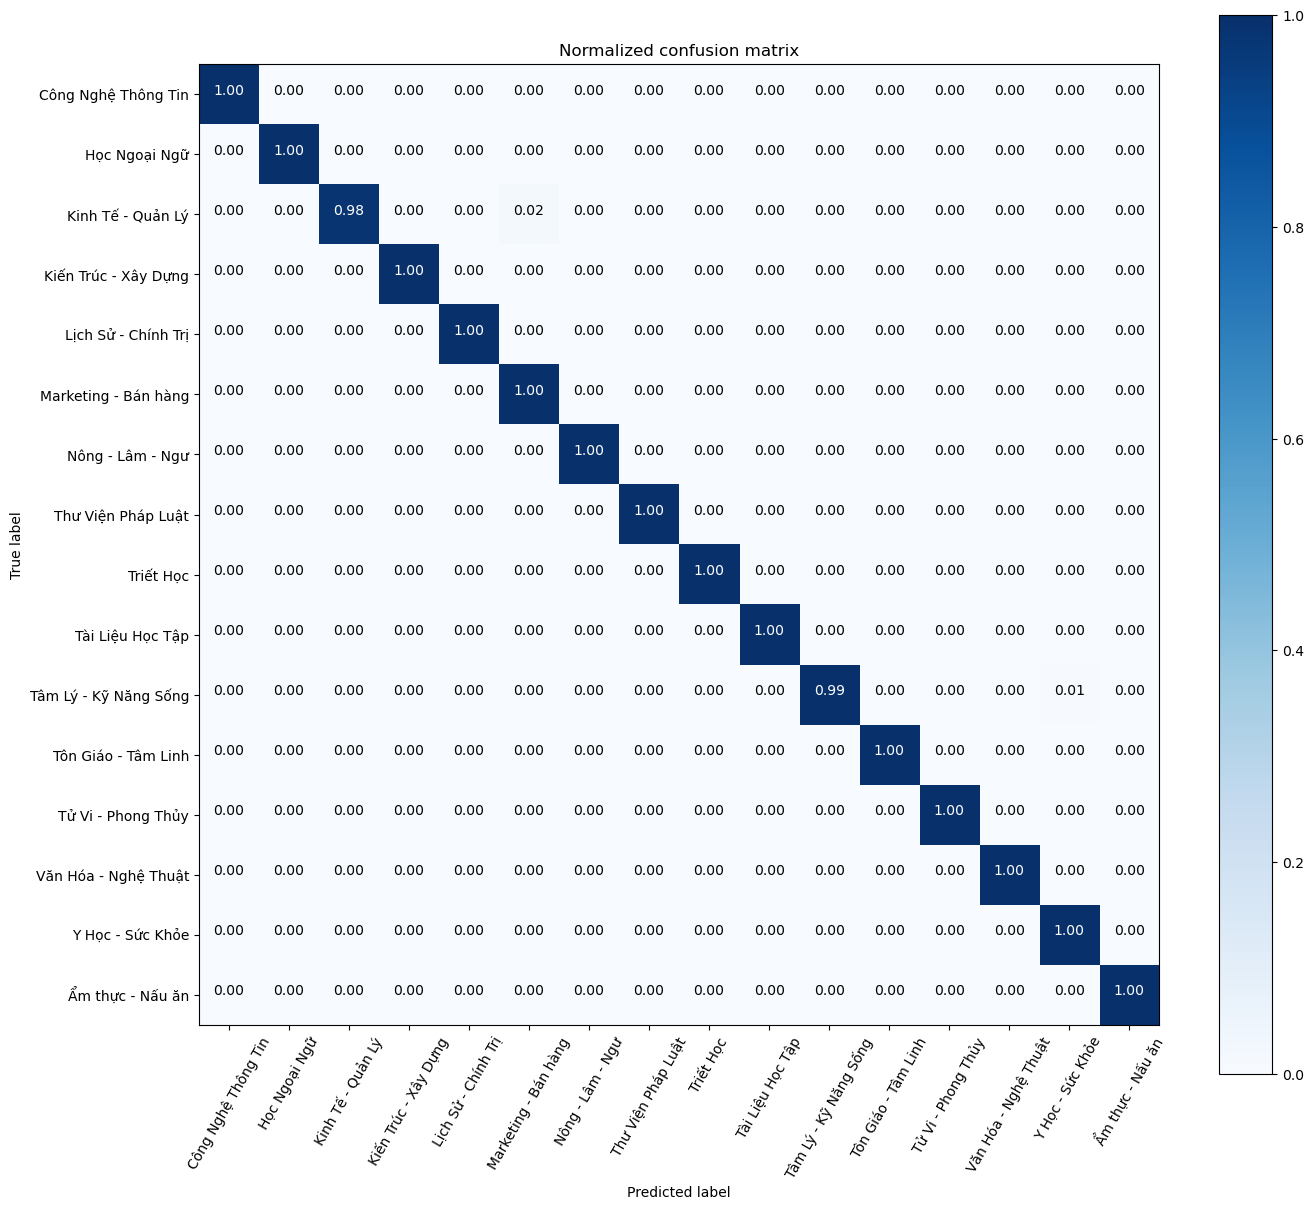

In [102]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_label, y_pred_label)

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = onehot.categories_[0]
# # plt.figure()
# plt.figure(figsize=(14, 12))

# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure()
plt.figure(figsize=(14, 12))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.xticks(rotation=60)  
plt.savefig('confusion_matrix.png')

plt.show()

In [105]:
#accuracy
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test_label, y_pred_label))

accuracy =  0.9964291787111036


In [109]:
from sklearn.metrics import recall_score

# Tính toán recall trên tập huấn luyện
y_train_pred = model.predict(X_train)
y_train_pred_label = onehot.inverse_transform(y_train_pred)

train_recall = recall_score(y_train_label, y_train_pred_label, average='weighted')

# Tính toán recall trên tập kiểm tra
test_recall = recall_score(y_test_label, y_pred_label, average='weighted')

print("Recall trên tập huấn luyện:", train_recall)
print("Recall trên tập kiểm tra:", test_recall)

735/735 [==============================] - 5s 7ms/step
Recall trên tập huấn luyện: 0.9960459183673469
Recall trên tập kiểm tra: 0.9964291787111036


In [111]:
from sklearn.metrics import f1_score

# Tính toán F-measure trên tập huấn luyện
train_f1 = f1_score(y_train_label, y_train_pred_label, average='weighted')

# Tính toán F-measure trên tập kiểm tra
test_f1 = f1_score(y_test_label, y_pred_label, average='weighted')

print("F-measure trên tập huấn luyện:", train_f1)
print("F-measure trên tập kiểm tra:", test_f1)

F-measure trên tập huấn luyện: 0.9960610036977832
F-measure trên tập kiểm tra: 0.9964366291123864


Minimum validation loss: 0.0008088406757451594


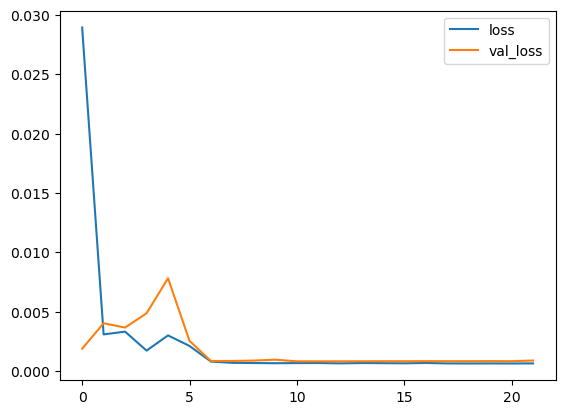

In [142]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
# plt.savefig('loss_plot.png')

In [15]:
model.save('best_model_scaled.h5')

In [12]:
import joblib

joblib.dump(count_vectorizer, 'count_vectorizer.joblib')
joblib.dump(onehot, 'one_hot_encoder.joblib')
joblib.dump(tfidf_transformer, 'tfidf.joblib')

['tfidf.joblib']

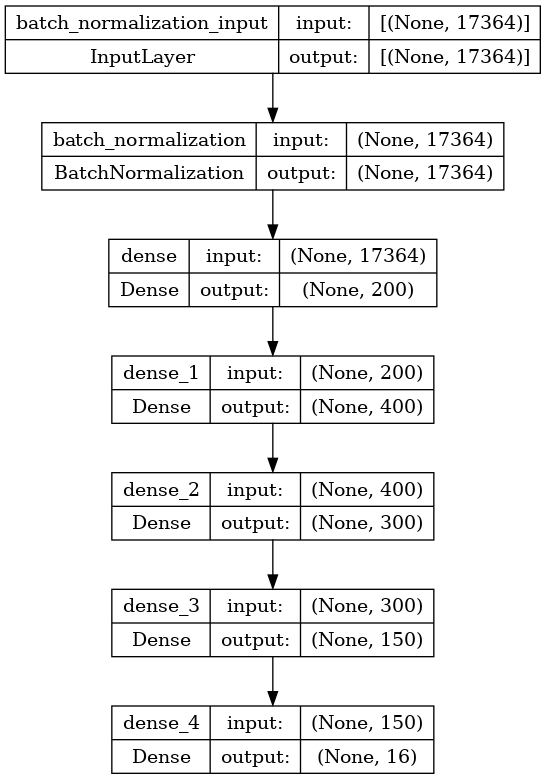

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_visualization.png', show_shapes=True)
